# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Your objective is to build a series of scatter plots to showcase the following relationships:
# * Temperature (F) vs. Latitude
# * Humidity (%) vs. Latitude
# * Cloudiness (%) vs. Latitude
# * Wind Speed (mph) vs. Latitude

# Your final notebook must:
# * Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
# * Perform a weather check on each of the cities using a series of successive API calls.
# * Include a print log of each city as it's being processed with the city number and city name.
# * Save both a CSV of all data retrieved and png images for each scatter plot.

# The Equator is the line of 0 degrees latitude. Each parallel measures one degree north or south 
# of the Equator, with 90 degrees north of the Equator and 90 degrees south of the Equator. 

# Observed Trend 1 -- There is definitely a relationship between proximity to the equator and temperature as shown by
# the cluster of higher temperatures between -40 and +40 degrees. At this time of year, temperatures are highest in 
# the area around the Tropic of Cancer as the Earth tilts more closely in that area towards the Sun. 
# During Fall in the northern hemisphere, you would expect to see a shift in higher temperatures back towards the 
# equator.  During Winter in the northern hemisphere, you would expect a shift in higher temperatures to move 
# more towards the area around the Tropic of Capricorn as the Earth tilts more closely in that area towards the Sun.

# Observed Trend 2 -- There seems to be a correlation between lack of humidity and proximity to the equator as well.
# Lower humidity cities are centered between -40 and +40 degrees.

# Observed Trend 3 -- There does not seem to be a correlation between either cloudiness or windiness and 
# proximity to the equator.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporate citipy to determine city based on latitude and longitude
from citipy import citipy

# get today's date
from datetime import date
today = date.today().strftime("%m/%d/%y")

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities_to_search = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Use citypy to identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities_to_search:
        cities_to_search.append(city)

# just try with a few cities first
# cities = ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Philadelphia']

# Print the city count to confirm sufficient count
len(cities_to_search)

588

In [4]:
# base url
base_url = "http://api.openweathermap.org/data/2.5/weather?"

units = "Imperial"

query_url = f"{base_url}appid={api_key}&units={units}&q="


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# * Temperature (F) vs. Latitude
# * Humidity (%) vs. Latitude
# * Cloudiness (%) vs. Latitude
# * Wind Speed (mph) vs. Latitude
cities = []
lon = []
lat = []
temp = []
humidity = []
wind = []
clouds = []
country = []
date = []

# loop through cities, make API request, and append desired results.  use try/except logic so that 
# we don't store missing cities
for city in cities_to_search:
    try:
        response = requests.get(query_url + city).json()
        cities.append(response['name'])
        lon.append(response['coord']['lon'])
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind.append(response['wind']['speed'])
        clouds.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print(f"City: {city}")
        print(f"Longitude: {response['coord']['lon']}")
        print(f"Latitude: {response['coord']['lat']}")
        print(f"Temperature: {response['main']['temp_max']}")
        print(f"Humidity: {response['main']['humidity']}")
        print(f"Wind: {response['wind']['speed']}")
        print(f"Clouds: {response['clouds']['all']}")
        print(f"Country: {response['sys']['country']}")
        print(f"Date: {response['dt']}")
    except (KeyError):
        print(f"City is missing... skipping: {city}")
              

City: busselton
Longitude: 115.35
Latitude: -33.64
Temperature: 54
Humidity: 54
Wind: 12.91
Clouds: 100
Country: AU
Date: 1566912916
City: jamestown
Longitude: 138.6
Latitude: -33.21
Temperature: 39.93
Humidity: 93
Wind: 0.78
Clouds: 0
Country: AU
Date: 1566912916
City: san jose de las lajas
Longitude: -82.15
Latitude: 22.96
Temperature: 80.6
Humidity: 88
Wind: 1.12
Clouds: 20
Country: CU
Date: 1566912916
City: makakilo city
Longitude: -158.09
Latitude: 21.35
Temperature: 81
Humidity: 78
Wind: 13.4
Clouds: 20
Country: US
Date: 1566912917
City: novobiryusinskiy
Longitude: 97.71
Latitude: 56.96
Temperature: 59.73
Humidity: 61
Wind: 9.13
Clouds: 60
Country: RU
Date: 1566912917
City: hermanus
Longitude: 19.24
Latitude: -34.42
Temperature: 59
Humidity: 67
Wind: 7
Clouds: 0
Country: ZA
Date: 1566912917
City: ancud
Longitude: -73.83
Latitude: -41.87
Temperature: 39.2
Humidity: 100
Wind: 12.75
Clouds: 90
Country: CL
Date: 1566912842
City: bluff
Longitude: 149.07
Latitude: -23.58
Temperature: 5

City: nikolskoye
Longitude: 30.79
Latitude: 59.7
Temperature: 71.6
Humidity: 46
Wind: 8.95
Clouds: 0
Country: RU
Date: 1566912931
City: nizwa
Longitude: 57.53
Latitude: 22.93
Temperature: 92.49
Humidity: 13
Wind: 11.79
Clouds: 0
Country: OM
Date: 1566912931
City: new norfolk
Longitude: 147.06
Latitude: -42.78
Temperature: 53.6
Humidity: 58
Wind: 11.41
Clouds: 75
Country: AU
Date: 1566912931
City: upernavik
Longitude: -56.15
Latitude: 72.79
Temperature: 37.77
Humidity: 54
Wind: 3.96
Clouds: 100
Country: GL
Date: 1566912931
City: east london
Longitude: 27.91
Latitude: -33.02
Temperature: 64.4
Humidity: 52
Wind: 14.99
Clouds: 75
Country: ZA
Date: 1566912932
City: rockhampton
Longitude: 150.51
Latitude: -23.38
Temperature: 60.8
Humidity: 93
Wind: 4.7
Clouds: 0
Country: AU
Date: 1566912932
City: thompson
Longitude: -97.86
Latitude: 55.74
Temperature: 44.6
Humidity: 93
Wind: 19.46
Clouds: 90
Country: CA
Date: 1566912768
City: saldanha
Longitude: -6.55
Latitude: 41.42
Temperature: 83.13
Humid

City: lebu
Longitude: 38.73
Latitude: 8.96
Temperature: 57.2
Humidity: 87
Wind: 9.17
Clouds: 90
Country: ET
Date: 1566912967
City: marsala
Longitude: 12.44
Latitude: 37.8
Temperature: 88
Humidity: 79
Wind: 8.05
Clouds: 20
Country: IT
Date: 1566912967
City is missing... skipping: sitio novo do tocantins
City: belmonte
Longitude: -7.35
Latitude: 40.36
Temperature: 84
Humidity: 46
Wind: 3.8
Clouds: 61
Country: PT
Date: 1566912967
City: bethel
Longitude: -161.76
Latitude: 60.79
Temperature: 51.8
Humidity: 93
Wind: 8.05
Clouds: 75
Country: US
Date: 1566912737
City: bilibino
Longitude: 166.44
Latitude: 68.06
Temperature: 43.35
Humidity: 95
Wind: 2.89
Clouds: 100
Country: RU
Date: 1566912968
City: faanui
Longitude: -151.75
Latitude: -16.48
Temperature: 78.09
Humidity: 77
Wind: 14.67
Clouds: 14
Country: PF
Date: 1566912968
City: nikolsk
Longitude: 45.45
Latitude: 59.53
Temperature: 50.19
Humidity: 87
Wind: 13.4
Clouds: 74
Country: RU
Date: 1566912968
City: xuddur
Longitude: 43.89
Latitude: 4.1

City: punta cardon
Longitude: -70.22
Latitude: 11.61
Temperature: 81.69
Humidity: 77
Wind: 23.24
Clouds: 0
Country: VE
Date: 1566912982
City: ginda
Longitude: 78.49
Latitude: 30.69
Temperature: 63.15
Humidity: 94
Wind: 1.54
Clouds: 94
Country: IN
Date: 1566912983
City: ucluelet
Longitude: -125.55
Latitude: 48.94
Temperature: 55
Humidity: 100
Wind: 1.07
Clouds: 5
Country: CA
Date: 1566912983
City: miraflores
Longitude: -71.52
Latitude: -16.39
Temperature: 66.2
Humidity: 6
Wind: 2.24
Clouds: 0
Country: PE
Date: 1566912983
City: kolno
Longitude: 21.93
Latitude: 53.41
Temperature: 86
Humidity: 33
Wind: 8.05
Clouds: 0
Country: PL
Date: 1566912983
City: oktyabrskoye
Longitude: 85.44
Latitude: 56.73
Temperature: 68
Humidity: 64
Wind: 11.18
Clouds: 20
Country: RU
Date: 1566912984
City: burns lake
Longitude: -125.76
Latitude: 54.23
Temperature: 46.77
Humidity: 96
Wind: 2.21
Clouds: 100
Country: CA
Date: 1566912984
City: yuzhno-kurilsk
Longitude: 145.86
Latitude: 44.03
Temperature: 61.71
Humidit

City: pringsewu
Longitude: 104.98
Latitude: -5.36
Temperature: 70.35
Humidity: 96
Wind: 0.89
Clouds: 69
Country: ID
Date: 1566912998
City is missing... skipping: inderborskiy
City: mansa
Longitude: 72.66
Latitude: 23.43
Temperature: 82.4
Humidity: 94
Wind: 8.05
Clouds: 75
Country: IN
Date: 1566912998
City: geraldton
Longitude: -86.95
Latitude: 49.72
Temperature: 59
Humidity: 93
Wind: 4.7
Clouds: 90
Country: CA
Date: 1566912998
City: sao marcos
Longitude: -51.07
Latitude: -28.97
Temperature: 69.01
Humidity: 68
Wind: 3
Clouds: 0
Country: BR
Date: 1566912999
City: la ronge
Longitude: -105.3
Latitude: 55.1
Temperature: 50
Humidity: 93
Wind: 5.82
Clouds: 90
Country: CA
Date: 1566912999
City: norman wells
Longitude: -126.83
Latitude: 65.28
Temperature: 41
Humidity: 100
Wind: 3.36
Clouds: 40
Country: CA
Date: 1566912999
City: constitucion
Longitude: -104.67
Latitude: 23.99
Temperature: 61
Humidity: 100
Wind: 12.88
Clouds: 90
Country: MX
Date: 1566912999
City is missing... skipping: halalo
Cit

City: honiara
Longitude: 159.96
Latitude: -9.43
Temperature: 77
Humidity: 100
Wind: 18.5
Clouds: 40
Country: SB
Date: 1566913014
City: vila velha
Longitude: -38.6
Latitude: -3.71
Temperature: 87.8
Humidity: 45
Wind: 14.99
Clouds: 20
Country: BR
Date: 1566913014
City: las palmas
Longitude: -75.33
Latitude: 9.27
Temperature: 86.37
Humidity: 74
Wind: 7.54
Clouds: 70
Country: CO
Date: 1566913014
City is missing... skipping: pousat
City: valparaiso
Longitude: -87.06
Latitude: 41.47
Temperature: 69.01
Humidity: 94
Wind: 8.05
Clouds: 75
Country: US
Date: 1566913015
City: leningradskiy
Longitude: 178.42
Latitude: 69.38
Temperature: 39.57
Humidity: 94
Wind: 6.49
Clouds: 100
Country: RU
Date: 1566913015
City: north bend
Longitude: -124.22
Latitude: 43.41
Temperature: 57.99
Humidity: 100
Wind: 14.67
Clouds: 1
Country: US
Date: 1566913015
City: miri
Longitude: 9.75
Latitude: 10.31
Temperature: 74.85
Humidity: 87
Wind: 2.33
Clouds: 100
Country: NG
Date: 1566913015
City: klaksvik
Longitude: -6.59
La

City: zhireken
Longitude: 117.29
Latitude: 52.82
Temperature: 50.19
Humidity: 82
Wind: 6.4
Clouds: 82
Country: RU
Date: 1566913029
City: okato
Longitude: 173.88
Latitude: -39.19
Temperature: 43
Humidity: 80
Wind: 1.01
Clouds: 0
Country: NZ
Date: 1566913030
City: khasan
Longitude: 130.64
Latitude: 42.43
Temperature: 63.87
Humidity: 99
Wind: 3.56
Clouds: 93
Country: RU
Date: 1566913030
City: santiago
Longitude: 121.54
Latitude: 16.69
Temperature: 73.95
Humidity: 99
Wind: 1.59
Clouds: 100
Country: PH
Date: 1566913030
City: abha
Longitude: 42.5
Latitude: 18.22
Temperature: 82.4
Humidity: 56
Wind: 13.87
Clouds: 40
Country: SA
Date: 1566913030
City: broome
Longitude: 1.45
Latitude: 52.47
Temperature: 91.99
Humidity: 42
Wind: 10.29
Clouds: 0
Country: GB
Date: 1566913031
City: sydney
Longitude: 151.22
Latitude: -33.85
Temperature: 57.2
Humidity: 76
Wind: 9.17
Clouds: 75
Country: AU
Date: 1566912938
City is missing... skipping: domoni
City: morant bay
Longitude: -76.41
Latitude: 17.88
Temperatu

City: kargala
Longitude: 83.96
Latitude: 56.62
Temperature: 64.99
Humidity: 82
Wind: 6.76
Clouds: 85
Country: RU
Date: 1566913045
City: djougou
Longitude: 1.67
Latitude: 9.71
Temperature: 78.8
Humidity: 74
Wind: 9.17
Clouds: 75
Country: BJ
Date: 1566913046
City: port hardy
Longitude: -127.42
Latitude: 50.7
Temperature: 53.6
Humidity: 93
Wind: 6.13
Clouds: 75
Country: CA
Date: 1566913046
City: kigoma
Longitude: 29.64
Latitude: -4.88
Temperature: 84.2
Humidity: 51
Wind: 6.93
Clouds: 40
Country: TZ
Date: 1566913046
City: daru
Longitude: 143.21
Latitude: -9.07
Temperature: 73.77
Humidity: 81
Wind: 7.27
Clouds: 98
Country: PG
Date: 1566913046
City: shrewsbury
Longitude: -76.68
Latitude: 39.77
Temperature: 68
Humidity: 88
Wind: 3.36
Clouds: 75
Country: US
Date: 1566912997
City is missing... skipping: krasnoselkup
City is missing... skipping: kusk
City: quelimane
Longitude: 36.89
Latitude: -17.88
Temperature: 84.2
Humidity: 48
Wind: 12.75
Clouds: 20
Country: MZ
Date: 1566913047
City: xinyu
Lo

City: narimanov
Longitude: 47.85
Latitude: 46.69
Temperature: 84.2
Humidity: 32
Wind: 11.18
Clouds: 40
Country: RU
Date: 1566913061
City: itoman
Longitude: 127.67
Latitude: 26.12
Temperature: 84.2
Humidity: 83
Wind: 6.93
Clouds: 20
Country: JP
Date: 1566913061
City is missing... skipping: sakakah
City: poya
Longitude: 165.16
Latitude: -21.35
Temperature: 69.45
Humidity: 78
Wind: 7.9
Clouds: 35
Country: NC
Date: 1566913061
City is missing... skipping: gulshat
City: chenghai
Longitude: 116.77
Latitude: 23.46
Temperature: 84.2
Humidity: 83
Wind: 4.47
Clouds: 0
Country: CN
Date: 1566913062
City: ust-nera
Longitude: 143.24
Latitude: 64.57
Temperature: 42.81
Humidity: 79
Wind: 4.36
Clouds: 37
Country: RU
Date: 1566913062
City: bull savanna
Longitude: -77.59
Latitude: 17.89
Temperature: 81.33
Humidity: 72
Wind: 2.64
Clouds: 64
Country: JM
Date: 1566913062
City: morristown
Longitude: -83.29
Latitude: 36.21
Temperature: 70
Humidity: 100
Wind: 4.7
Clouds: 90
Country: US
Date: 1566913062
City: pa

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
city_weather_df = pd.DataFrame(
    {'City': cities,
     'Country': country,
     'Date': date,
     'Latitude': lat,
     'Longitude': lon,
     'Temperature': temp,
     'Humidity': humidity,
     'Wind': wind,
     'Clouds': clouds
    })

export_csv = city_weather_df.to_csv ('cities.csv', index = None, header=True) 

city_weather_df.head()

,City,Country,Date,Latitude,Longitude,Temperature,Humidity,Wind,Clouds
0,Busselton,AU,1566912916,-33.64,115.35,54.00,54,12.91,100
1,Jamestown,AU,1566912916,-33.21,138.60,39.93,93,0.78,0
2,San Jose de las Lajas,CU,1566912916,22.96,-82.15,80.60,88,1.12,20
3,Makakilo City,US,1566912917,21.35,-158.09,81.00,78,13.40,20
4,Novobiryusinskiy,RU,1566912917,56.96,97.71,59.73,61,9.13,60


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

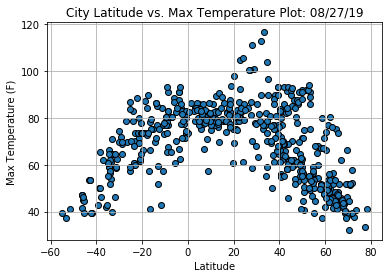

In [7]:
# Latitude vs. Temperature Plot
plt.scatter(city_weather_df["Latitude"], city_weather_df["Temperature"], marker="o", edgecolor="black")
          
plt.title(f"City Latitude vs. Max Temperature Plot: {today}")  
                
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudeVsTemperaturePlot.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

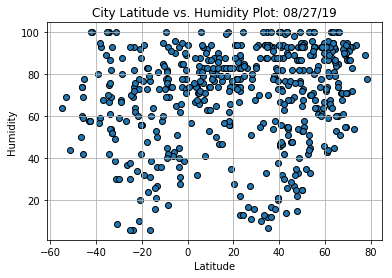

In [8]:
# Latitude vs. Humidity Plot
plt.scatter(city_weather_df["Latitude"], city_weather_df["Humidity"], marker="o", edgecolor="black")

plt.title(f"City Latitude vs. Humidity Plot: {today}") 
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudeVsHumidityPlot.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

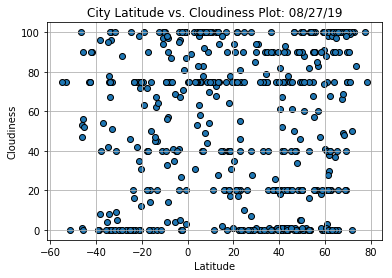

In [9]:
# Latitude vs. Cloudiness Plot
plt.scatter(city_weather_df["Latitude"], city_weather_df["Clouds"], marker="o", edgecolor="black")

plt.title(f"City Latitude vs. Cloudiness Plot: {today}") 
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudeVsCloudinessPlot.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

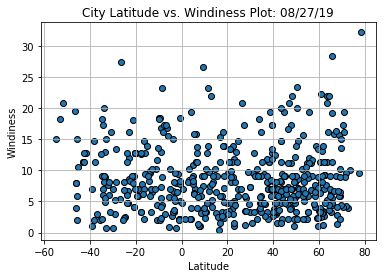

In [10]:
# Latitude vs. Windiness Plot
plt.scatter(city_weather_df["Latitude"], city_weather_df["Wind"], marker="o", edgecolor="black")

plt.title(f"City Latitude vs. Windiness Plot: {today}") 
plt.ylabel("Windiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudeVsWindinessPlot.png")

# Show plot
plt.show()